In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

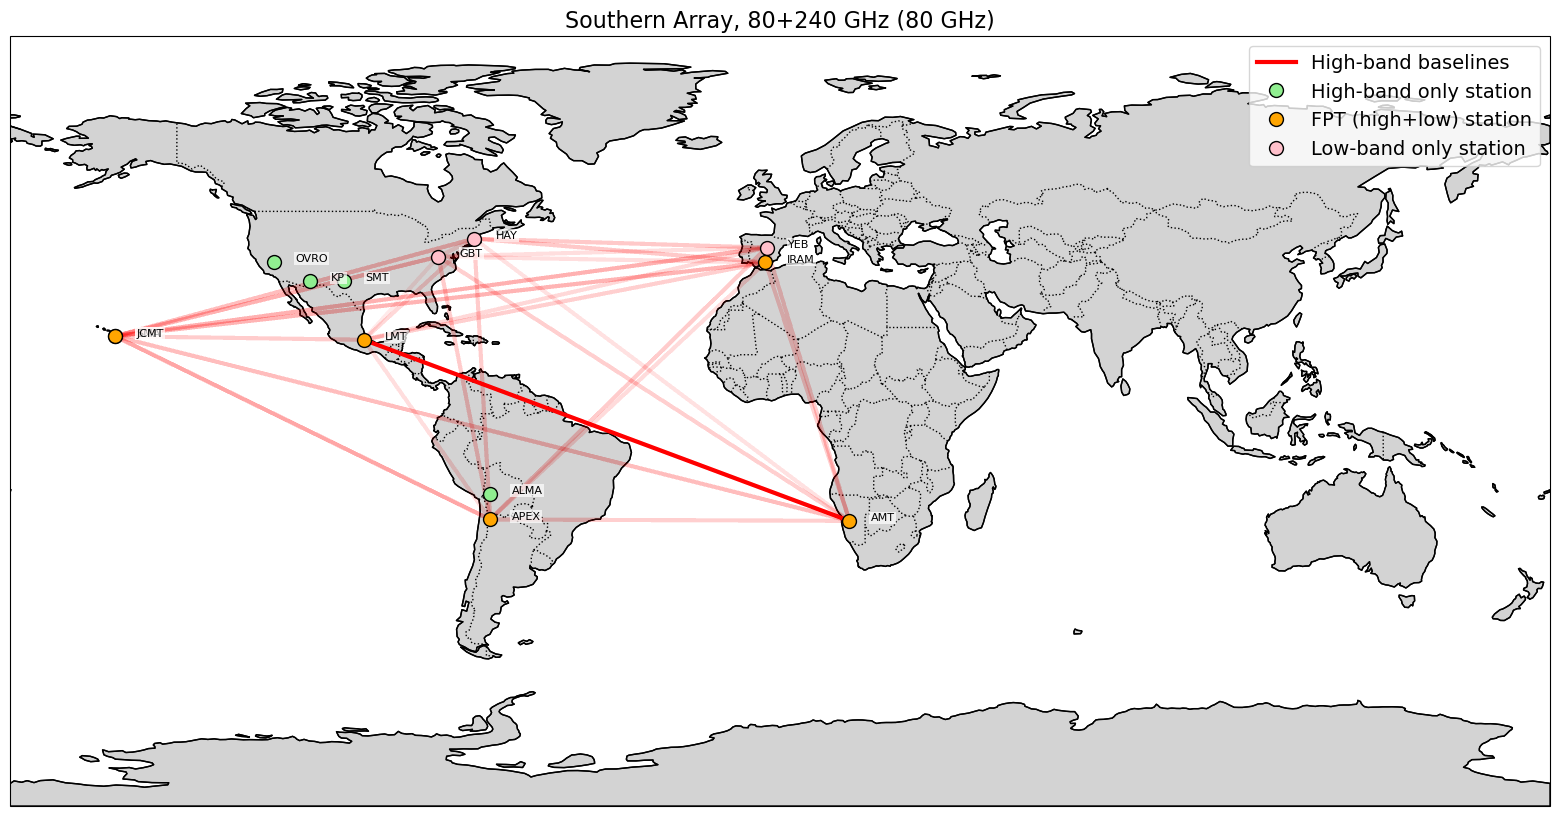

In [2]:
# データの読み込み
tab = pd.read_csv("dummy_Southern_station.csv")
right_five_columns = tab.iloc[:, -5:]

# 観測所のリスト
station_coords = {
    "ALMA": (-67.753333, -17.0191667),
    "APEX": (-67.753333, -23.0191667),
    "SMT": (-101.891111, 32.7016667),
    "KP": (-109.891111, 32.7016667),
    "LMT": (-97.3147222, 18.9858333),
    "SMA": (-155.478056, 19.824167),
    "JCMT": (-155.478056, 19.824167),
    #"SPT": (0, -86),
    "IRAM": (-3.39277778, 37.0661111),
    #"NOEMA": (5.908056, 44.63389),
    #"GLT": (-68.7030556, 76.53111111),
    "OVRO": (-118.282, 37.2339),
    "HAY": (-71.48833, 42.62333),
    #"NOB": (138.47246,35.944476 ),
    #"KVNPC": (128.449676,37.534119 ),
    "GBT": (-79.83967, 38.433502),
    "YEB": (-3.088497, 40.523472),
    "AMT": (16.229246, -23.3393)
}

proj_mw = ccrs.Mollweide(central_longitude=0)
proj_pc = ccrs.PlateCarree(central_longitude=0)
trans_geo = ccrs.Geodetic()
trans_mw = ccrs.Mollweide()
trans_pc = ccrs.PlateCarree()

# プロットの準備
fig = plt.figure(figsize=(30, 10))
ax = plt.axes(projection=proj_pc)
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 観測所と線のプロット（別の除外リストを使用）
excluded_stations_240 = {"ALMA", "SMT", "KP", "OVRO"}  # 定義を追加

j = 0
for _, row in right_five_columns.iterrows():
    stations = row.dropna().tolist()
    for i, station1 in enumerate(stations):
        for station2 in stations[i + 1:]:
            if station1 in excluded_stations_240 or station2 in excluded_stations_240:
                continue
            
            if station1 in station_coords and station2 in station_coords:
                lon1, lat1 = station_coords[station1]
                lon2, lat2 = station_coords[station2]
                if j == 0:
                    label = "High-band baselines"
                else:
                    label = ""
                ax.plot([lon1, lon2], [lat1, lat2], transform=trans_pc, color='red', linewidth=3, alpha=0.01, label=label)
                j += 1


   
# 各観測所をプロット
color_map = {
    "ALMA": "lightgreen", "SMT": "lightgreen", "KP": "lightgreen", "OVRO": "lightgreen",
    "GBT": "pink", "HAY": "pink",  "YEB": "pink"
}

for name, (lon, lat) in station_coords.items():
    if name in color_map:
        color = color_map[name]
    else:
        color = "orange"
    if name == "SMT":
        label = "High-band only station"
    elif name == "LMT":
        label = "FPT (high+low) station"
    elif name == "HAY":
        label = "Low-band only station"
    else:
        label = ""
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), mfc=color, ls="none", mec='black', marker='o', markersize=10, label=label)
    ax.text(lon + 5, lat, name, transform=ccrs.PlateCarree(), fontsize=8, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    
for lh in ax.get_legend_handles_labels()[0]:
    lh.set_alpha(1.0)
plt.legend(fontsize=14)

# グラフの表示
ax.set_title("Southern Array, 80+240 GHz (80 GHz)", fontsize=16)
plt.show()


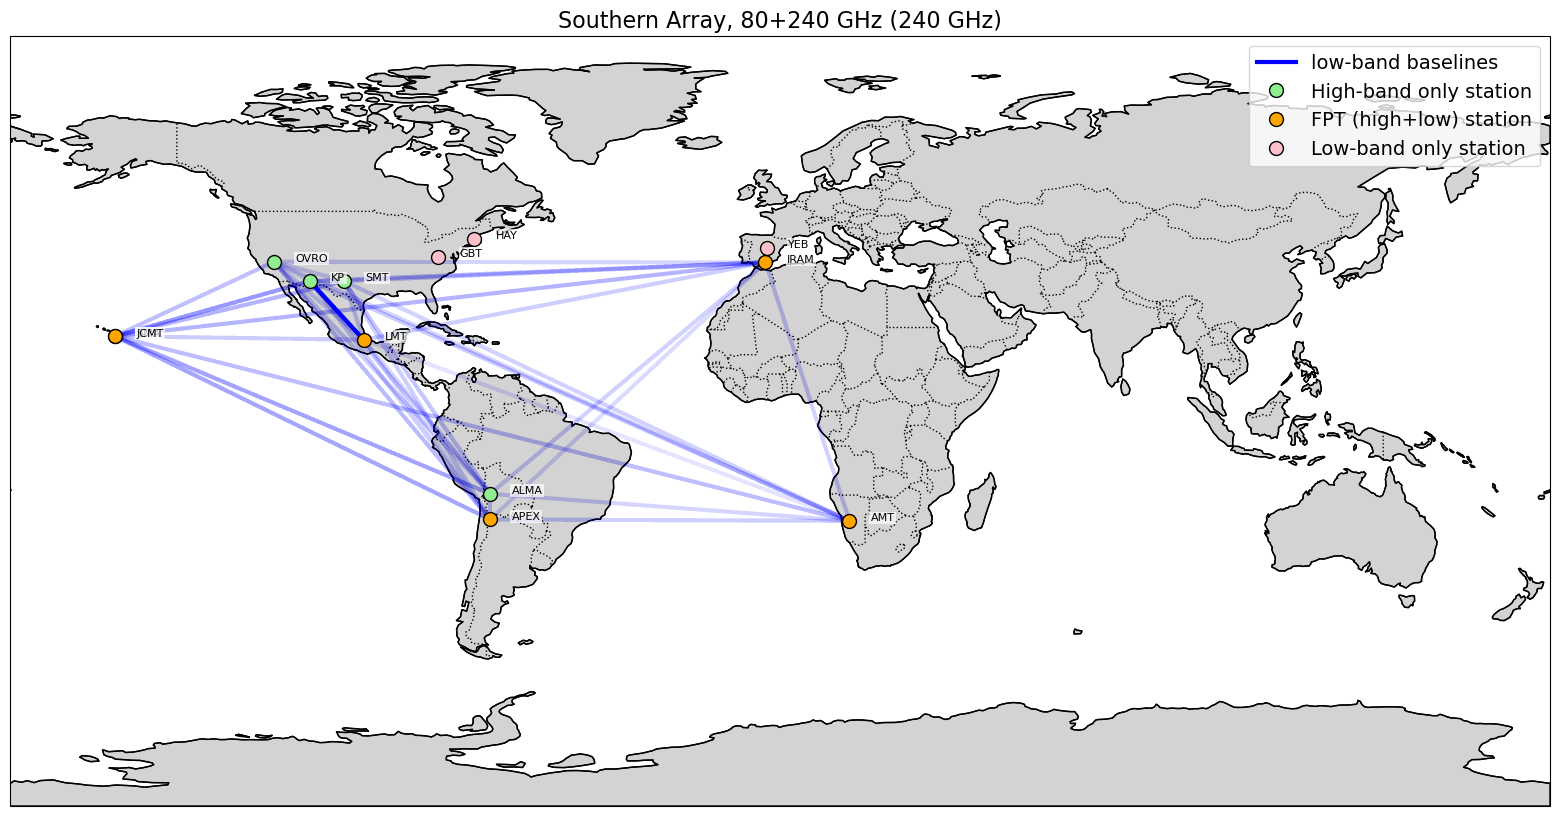

In [3]:
# データの読み込み
tab = pd.read_csv("dummy_Southern_station.csv")
right_five_columns = tab.iloc[:, -5:]

# 観測所のリスト
station_coords = {
    "ALMA": (-67.753333, -17.0191667),
    "APEX": (-67.753333, -23.0191667),
    "SMT": (-101.891111, 32.7016667),
    "KP": (-109.891111, 32.7016667),
    "LMT": (-97.3147222, 18.9858333),
    "SMA": (-155.478056, 19.824167),
    "JCMT": (-155.478056, 19.824167),
    #"SPT": (0, -86),
    "IRAM": (-3.39277778, 37.0661111),
    #"NOEMA": (5.908056, 44.63389),
    #"GLT": (-68.7030556, 76.53111111),
    "OVRO": (-118.282, 37.2339),
    "HAY": (-71.48833, 42.62333),
    #"NOB": (138.47246,35.944476 ),
    #"KVNPC": (128.449676,37.534119 ),
    "GBT": (-79.83967, 38.433502),
    "YEB": (-3.088497, 40.523472),
    "AMT": (16.229246, -23.3393)
}

proj_mw = ccrs.Mollweide(central_longitude=0)
proj_pc = ccrs.PlateCarree(central_longitude=0)
trans_geo = ccrs.Geodetic()
trans_mw = ccrs.Mollweide()
trans_pc = ccrs.PlateCarree()

# プロットの準備
fig = plt.figure(figsize=(30, 10))
ax = plt.axes(projection=proj_pc)
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 観測所と線のプロット
excluded_stations_240 = {"GBT", "HAY", "YEB"}  # 除外する観測所（定義を追加）

j = 0
for _, row in right_five_columns.iterrows():
    stations = row.dropna().tolist()
    for i, station1 in enumerate(stations):
        for station2 in stations[i + 1:]:
            if station1 in excluded_stations_240 or station2 in excluded_stations_240:
                continue
            
            if station1 in station_coords and station2 in station_coords:
                lon1, lat1 = station_coords[station1]
                lon2, lat2 = station_coords[station2]
                if j == 0:
                    label = "low-band baselines"
                else:
                    label = ""
                ax.plot([lon1, lon2], [lat1, lat2], transform=trans_pc, color='blue', linewidth=3, alpha=0.01, label=label)
                j += 1
# 各観測所をプロット
color_map = {
    "ALMA": "lightgreen", "SMT": "lightgreen", "KP": "lightgreen", "OVRO": "lightgreen",
    "GBT": "pink", "HAY": "pink",  "YEB": "pink"
}

for name, (lon, lat) in station_coords.items():
    if name in color_map:
        color = color_map[name]
    else:
        color = "orange"
    if name == "SMT":
        label = "High-band only station"
    elif name == "LMT":
        label = "FPT (high+low) station"
    elif name == "HAY":
        label = "Low-band only station"
    else:
        label = ""
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), mfc=color, ls="none", mec='black', marker='o', markersize=10, label=label)
    ax.text(lon + 5, lat, name, transform=ccrs.PlateCarree(), fontsize=8, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    
for lh in ax.get_legend_handles_labels()[0]:
    lh.set_alpha(1.0)
plt.legend(fontsize=14)
# グラフの表示
ax.set_title("Southern Array, 80+240 GHz (240 GHz)", fontsize=16)
plt.show()


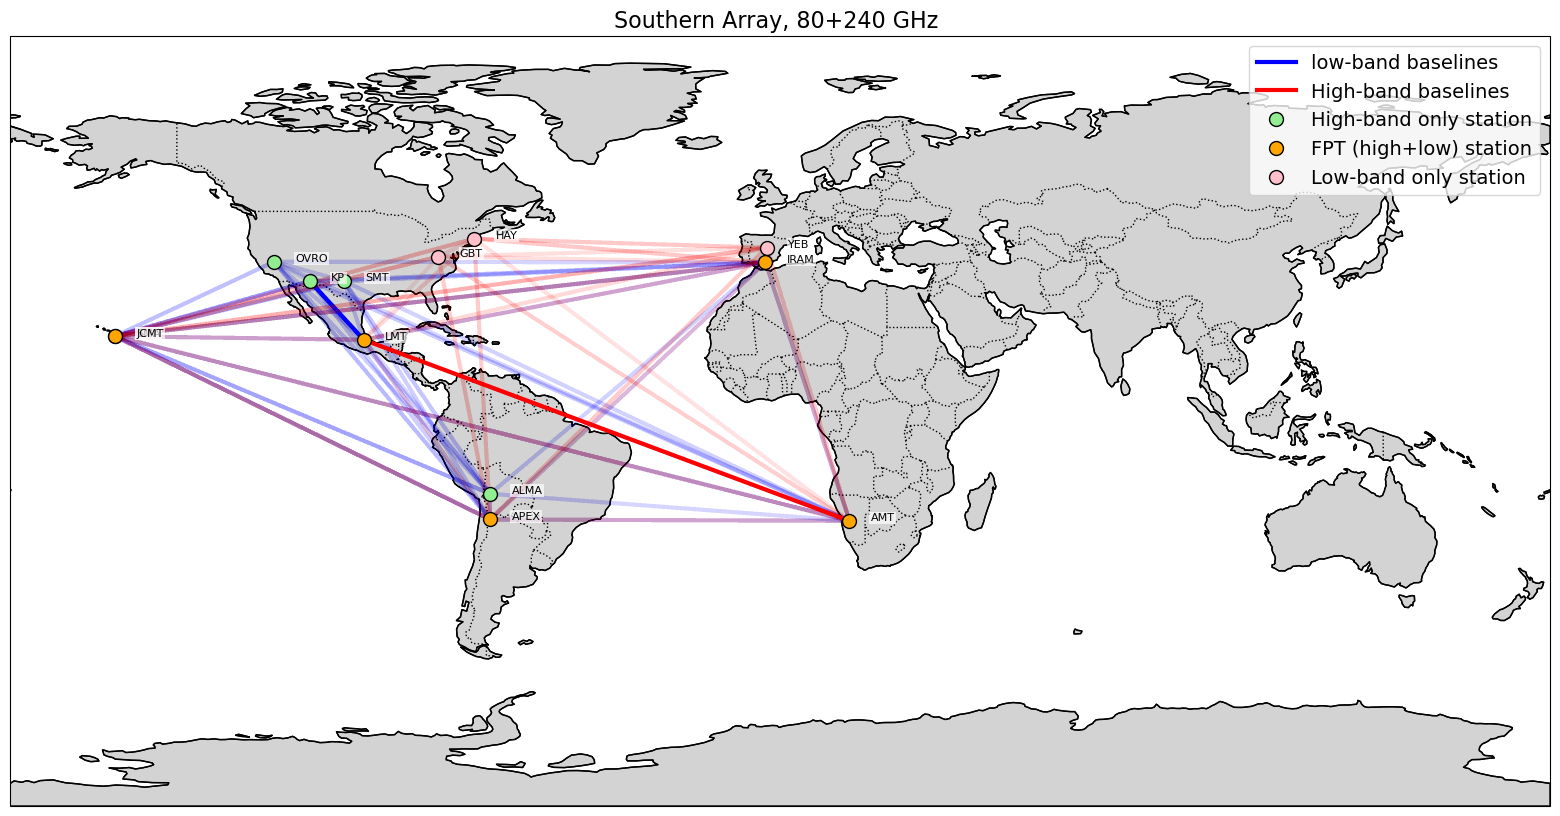

In [4]:
# データの読み込み
tab = pd.read_csv("dummy_Southern_station.csv")
right_five_columns = tab.iloc[:, -5:]

# 観測所のリスト
station_coords = {
    "ALMA": (-67.753333, -17.0191667),
    "APEX": (-67.753333, -23.0191667),
    "SMT": (-101.891111, 32.7016667),
    "KP": (-109.891111, 32.7016667),
    "LMT": (-97.3147222, 18.9858333),
    "SMA": (-155.478056, 19.824167),
    "JCMT": (-155.478056, 19.824167),
    #"SPT": (0, -86),
    "IRAM": (-3.39277778, 37.0661111),
    #"NOEMA": (5.908056, 44.63389),
    #"GLT": (-68.7030556, 76.53111111),
    "OVRO": (-118.282, 37.2339),
    "HAY": (-71.48833, 42.62333),
    #"NOB": (138.47246,35.944476 ),
    #"KVNPC": (128.449676,37.534119 ),
    "GBT": (-79.83967, 38.433502),
    "YEB": (-3.088497, 40.523472),
    "AMT": (16.229246, -23.3393)
}

proj_mw = ccrs.Mollweide(central_longitude=0)
proj_pc = ccrs.PlateCarree(central_longitude=0)
trans_geo = ccrs.Geodetic()
trans_mw = ccrs.Mollweide()
trans_pc = ccrs.PlateCarree()

# プロットの準備
fig = plt.figure(figsize=(30, 10))
ax = plt.axes(projection=proj_pc)
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 観測所と線のプロット
excluded_stations_240 = {"GBT", "HAY", "YEB"}  # 除外する観測所（定義を追加）

j = 0
for _, row in right_five_columns.iterrows():
    stations = row.dropna().tolist()
    for i, station1 in enumerate(stations):
        for station2 in stations[i + 1:]:
            if station1 in excluded_stations_240 or station2 in excluded_stations_240:
                continue
            
            if station1 in station_coords and station2 in station_coords:
                lon1, lat1 = station_coords[station1]
                lon2, lat2 = station_coords[station2]
                if j == 0:
                    label = "low-band baselines"
                else:
                    label = ""
                ax.plot([lon1, lon2], [lat1, lat2], transform=trans_pc, color='blue', linewidth=3, alpha=0.01, label=label)
                j += 1

# 観測所と線のプロット（別の除外リストを使用）
excluded_stations_240 = {"ALMA", "SMT", "KP", "OVRO"}  # 定義を追加

j = 0
for _, row in right_five_columns.iterrows():
    stations = row.dropna().tolist()
    for i, station1 in enumerate(stations):
        for station2 in stations[i + 1:]:
            if station1 in excluded_stations_240 or station2 in excluded_stations_240:
                continue
            
            if station1 in station_coords and station2 in station_coords:
                lon1, lat1 = station_coords[station1]
                lon2, lat2 = station_coords[station2]
                if j == 0:
                    label = "High-band baselines"
                else:
                    label = ""
                ax.plot([lon1, lon2], [lat1, lat2], transform=trans_pc, color='red', linewidth=3, alpha=0.01, label=label)
                j += 1

# 各観測所をプロット
color_map = {
    "ALMA": "lightgreen", "SMT": "lightgreen", "KP": "lightgreen", "OVRO": "lightgreen",
    "GBT": "pink", "HAY": "pink",  "YEB": "pink"
}

for name, (lon, lat) in station_coords.items():
    if name in color_map:
        color = color_map[name]
    else:
        color = "orange"
    if name == "SMT":
        label = "High-band only station"
    elif name == "LMT":
        label = "FPT (high+low) station"
    elif name == "HAY":
        label = "Low-band only station"
    else:
        label = ""
    ax.plot(lon, lat, transform=ccrs.PlateCarree(), mfc=color, ls="none", mec='black', marker='o', markersize=10, label=label)
    ax.text(lon + 5, lat, name, transform=ccrs.PlateCarree(), fontsize=8, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    
for lh in ax.get_legend_handles_labels()[0]:
    lh.set_alpha(1.0)
plt.legend(fontsize=14)

# グラフの表示
ax.set_title("Southern Array, 80+240 GHz ", fontsize=16)
plt.show()
